Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

**Upload lemmatized data from previous assignment**

In [6]:
import pandas as pd
df = pd.read_csv("data_lemmatized.csv") # Contains 500 tweets for search word "Data Mining"

In [7]:
import numpy as np
from numpy import nan
# Since the list new contains nan values now that it is extracted from csv. remove all of those.
new_list = df.values.tolist()
for i in range(0,500):
  del new_list[i][0] # removes the index
  new_list[i] = list(set(new_list[i])) # removes all the nan and bring it to 1
  if new_list[i].count(nan) == 1: # remove all nan values
    new_list[i].remove(nan)
  else:
    1 ==1
    
data_lemmatized = new_list

## (1) (15 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [8]:
# Import all the necessary libraries for the assignment
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel



# Create dictionary using corpora module and create the corpus from the lemmatized data
id2word = corpora.Dictionary(data_lemmatized) # from the link above
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [9]:
# Build base LDA Model

lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word, num_topics=20, random_state=100,chunksize=100,passes=10,per_word_topics=True)

In [13]:
# View Topics base on the base model
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.073*"datum" + 0.061*"miner" + 0.056*"ga" + 0.056*"unload" + '
  '0.056*"center_operation" + 0.056*"college_park" + 0.056*"new" + '
  '0.017*"hour" + 0.017*"mine" + 0.017*"tagcoin"'),
 (1,
  '0.066*"mining" + 0.066*"datum" + 0.061*"people" + 0.055*"taking_advantage" '
  '+ 0.055*"call" + 0.055*"canada_action" + 0.018*"internet" + 0.016*"privacy" '
  '+ 0.016*"privacymatter" + 0.016*"roll"'),
 (2,
  '0.038*"facebook" + 0.038*"tha" + 0.038*"ongoing" + 0.038*"war" + '
  '0.038*"completely" + 0.038*"current" + 0.038*"ignore" + 0.038*"shitstorm" + '
  '0.038*"acczibit" + 0.010*"schedule"'),
 (3,
  '0.056*"datum" + 0.047*"power" + 0.042*"tagcoin" + 0.042*"one" + 0.042*"see" '
  '+ 0.037*"real" + 0.032*"mine" + 0.027*"co" + 0.026*"backed_nft" + '
  '0.016*"help"'),
 (4,
  '0.080*"company" + 0.080*"try" + 0.077*"family" + 0.077*"got_mad" + '
  '0.077*"garland" + 0.077*"million" + 0.077*"panorama" + 0.077*"question" + '
  '0.077*"made_via" + 0.077*"education"'),
 (5,
  '0.034*"co" + 0.

In [15]:
# Base Line Coherence - This is the coherence 

from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3371163432077421


In [16]:
# OPTIMUM NUMBER OF K-TOPICS BASED ON COHORENCE SCORE Function.
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [18]:
import os # This for gensim model to work that provides 
from gensim.models.wrappers import LdaMallet

os.environ.update({'MALLET_HOME':r'C:/new_mallet/mallet-2.0.8/'})
mallet_path = r'C:/new_mallet/mallet-2.0.8/bin/mallet'

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=60, step=6)

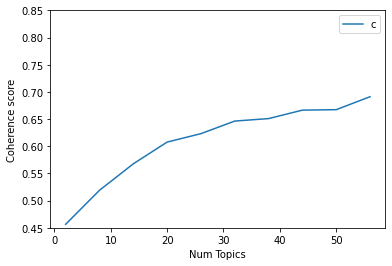

In [25]:
import matplotlib.pyplot as plots
# Show graph
limit=60; start=2; step=6;
x = range(start, limit, step)
plots.plot(x, coherence_values)
plots.xlabel("Num Topics")
plots.ylabel("Coherence score")
plots.legend(("coherence_values"), loc='best')
plots.ylim([0.45, 0.85])
plots.show()

In [21]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4565
Num Topics = 8  has Coherence Value of 0.519
Num Topics = 14  has Coherence Value of 0.5677
Num Topics = 20  has Coherence Value of 0.6077
Num Topics = 26  has Coherence Value of 0.6232
Num Topics = 32  has Coherence Value of 0.6463
Num Topics = 38  has Coherence Value of 0.6509
Num Topics = 44  has Coherence Value of 0.6664
Num Topics = 50  has Coherence Value of 0.6673
Num Topics = 56  has Coherence Value of 0.6911


**The Coherence number seems to slightly flatten at about 0.65 which is Num Topics = 38**

In [26]:
# Select the optimalmodel and print the topics
optimal_model = model_list[6]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(33,
  '0.362*"data" + 0.133*"child" + 0.124*"school" + 0.057*"company" + '
  '0.038*"full" + 0.019*"app" + 0.010*"feel" + 0.010*"fwmv" + 0.010*"spam" + '
  '0.010*"make"'),
 (32,
  '0.525*"school" + 0.197*"child" + 0.082*"call" + 0.025*"sympathetic" + '
  '0.025*"analysis" + 0.016*"crowdsource" + 0.008*"bkj" + 0.008*"tristansnell" '
  '+ 0.008*"pa" + 0.008*"utilise"'),
 (0,
  '0.095*"mining" + 0.076*"involve" + 0.076*"show" + 0.057*"social_media" + '
  '0.048*"ad" + 0.038*"tonight" + 0.038*"watch" + 0.038*"pm" + 0.038*"tune" + '
  '0.038*"tuckercarlson"'),
 (30,
  '0.181*"data" + 0.053*"true" + 0.043*"good" + 0.043*"give" + 0.032*"biden" + '
  '0.032*"claim" + 0.032*"cost" + 0.032*"massive" + 0.032*"spending" + '
  '0.021*"set"'),
 (29,
  '0.447*"datum" + 0.043*"drone" + 0.032*"human" + 0.032*"analytic" + '
  '0.021*"csnal" + 0.021*"launch" + 0.021*"social" + 0.021*"build" + '
  '0.021*"ushered" + 0.021*"usage"'),
 (25,
  '0.273*"bitcoin" + 0.061*"year" + 0.040*"month" + 0.040*"elden

# Summarize the topics

Here topic no# 33 - (33,
  '0.362*"data" + 0.133*"child" + 0.124*"school" + 0.057*"company" + '
  '0.038*"full" + 0.019*"app" + 0.010*"feel" + 0.010*"fwmv" + 0.010*"spam" + '
  '0.010*"make"')
  
  This means that top 10 keywords that contribute are these words and each weigh as times 10% i.e. data weighs 36.2% , child weighs 13.3%, school weighs 12.4%, etc. 
  <br> Topic 33 - data, child, school, company, full, spam, make ---> online business
  <br> Topic 30 - data, good, give, bid, set, claim, cost, spending ---> finance
  <br> Topic 18 - privacy, internet, protection, privacy_matter ---> security

## (2) (15 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [34]:
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plots

**Needs slight modification to prepare the matrix**

In [ ]:
# The following corpus needs slight modification based on the link provided.

In [40]:
def prepare_corpus(data_lemmatized):
    dictionary = corpora.Dictionary(data_lemmatized) # create dictionary
    data_lemmatized_matrix = [dictionary.doc2bow(doc) for doc in data_lemmatized]
    return dictionary,data_lemmatized_matrix
prepare_corpus(data_lemmatized);

In [42]:
#CREATE GENSIM LSA MODEL.
def create_gensim_lsa_model(data_lemmatized,number_of_topics,words):
    dictionary,data_lemmatized_matrix=prepare_corpus(data_lemmatized)
    # generate LSA model
    lsamodel = LsiModel(data_lemmatized_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel # returns the model.

**The following computes the coherence values so that we can pick one**

In [45]:
def compute_coherence_values(dictionary, data_lemmatized_matrix, data_lemmatized, stop, start=2, step=3):
    coherencevalues = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = LsiModel(data_lemmatized_matrix, num_topics=number_of_topics, id2word = dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
        coherencevalues.append(coherencemodel.get_coherence())
    return model_list, coherencevalues

In [50]:
def plot_graph(data_lemmatized,start, stop, step):
    dictionary,data_lemmatized_matrix=prepare_corpus(data_lemmatized)
    model_list, coherence_values = compute_coherence_values(dictionary, data_lemmatized_matrix,data_lemmatized,stop, start, step)
    x = range(start, stop, step)
    plots.plot(x, coherence_values)
    plots.xlabel("Number of Topics")
    plots.ylabel("Coherence score")
    plots.legend(("coherence_values"), loc='best')
    plots.show()

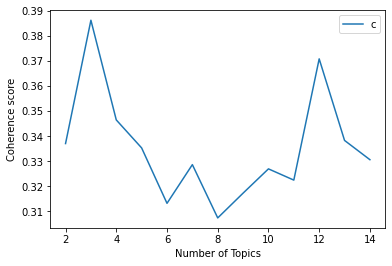

In [54]:
number_of_topics = 10
words = 12
plot_graph(data_lemmatized,2,15,1)

It is seen that the coherence is not as evident as the LDA model. 

In [49]:
model=create_gensim_lsa_model(data_lemmatized,number_of_topics,words)

[(0, '-0.411*"mining" + -0.355*"data" + -0.326*"company" + -0.321*"family" + -0.318*"call" + -0.310*"child" + -0.309*"school" + -0.308*"run" + -0.307*"involve" + -0.071*"co"'), (1, '0.576*"co" + 0.437*"mining" + 0.303*"datum" + 0.250*"https" + -0.170*"family" + 0.164*"research" + -0.161*"company" + 0.161*"web" + 0.156*"entry_scrape" + 0.156*"business_datascraper"'), (2, '0.316*"try" + 0.316*"education" + 0.315*"garland" + 0.313*"question" + 0.313*"got_mad" + 0.313*"made_via" + 0.313*"panorama" + 0.313*"million" + 0.237*"company" + 0.223*"family"'), (3, '-0.544*"datum" + 0.333*"data" + 0.324*"web" + 0.318*"research" + 0.318*"business_datascraper" + 0.318*"entry_scrape" + -0.147*"https" + -0.131*"call" + -0.128*"people" + -0.104*"taking_advantage"'), (4, '-0.417*"https" + 0.297*"datum" + -0.296*"co" + 0.294*"mining" + -0.264*"netflix_wherever" + -0.264*"favourite_serie" + -0.256*"free_download" + -0.252*"know" + -0.251*"enjoy" + -0.238*"daisy_thee"'), (5, '0.349*"mining" + -0.275*"new" +

# Summarize
Topic 1 - mining, data, company, family, call, child, school --->  Academics
<br> Topic 5 - mining, new, collegepark, unload, center_operation ---> data center 
<br> Topic 6 - people, taking_advantage, canada_action, favuurite_serie, netflix_whereever... ---> Online Movies and Series

## (3) (10 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

**LDA - Latent Dirichlet Allocation**:
a. More steps invloved in creating the model
b. Slower processing with better results
c. Coherence score is reliable
d. Doesn't use matrix concept and isn't bounded by matrix operations.
e. Algorithms has more fine tuning parameters and hence can be more customized based on the corpus.
f. This uses document distribution method
g. The optimum number of topics were 38.
    
    
**LSA - Latent Semantic Analysis**:
a. Simple to implement
b. Faster processing with inaccurate results
c. Coherence score unreliable
d. Use Matrix and hence is bounded by matrix operation.
e. Algorithm has less fine tuning parameters and therefore can be less customized based on the corpus
f. Uses document by keyword matrix method
g.Optimum number of topics is 5. Therefore, very unreliable.

